# Ayurvedic Prakruti Classification using DNA Sequencing with Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('Dataset.csv')

### Shuffling Dataset

In [3]:
dataset = dataset.reindex(np.random.permutation(dataset.index))
dataset.reset_index(inplace=True,drop=True)

### Splitting into dependent and independent variables

In [4]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [5]:
print(x)

[['GATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGATTTACTTCGGTAAAGAGCGGCGGACGGGTGAGTAACGCGTGGGTAACCTGCCCTGTACACACGGATAACATACCGAAAGGTATGCTAATACGAGATAACATGCTTTTATCGCATGGTAGAAGTATCAAAGCTCTGGCGGTACAGGATGGACCCGCGTCTGATTAGCTAGTTGGTAAGGTAACGGCATACCAAGGCGACGATCAGTAGCCGACCTGAGAGGGTGATCGGCCACATTGGAACTGAGACACGGTCCAAACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCAACGCCGCGTGAGCGATGAAGGCCTTCGGGTCGTAAAGCTCTGTCCTCAAGGAAGATAATGACGGTACTTGAGGAGGAAGCCCCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGGTGCGTAGGTGGTTTCTTAAGTCAGAGGTGAAAGGCTACGGCTCAACCGTAGTAAGCCTTTGAAACTGGGAAACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTTGCGAAGGCGGCTCTCGTGACTGTAACTGACACTGAGGCACGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGT']
 ['GATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGATTCTCTTCGGAGAAGAGCGGCGGACGGGTGAGTAACGCGTGGGTAACCTGCCCTGTACACACGGATAACATACCGAAAGGTATGCTAATACGAGATAATATGCTTTTATCGCATGGTAGAAGTATCAAAGCTTTTGCGGTACAGGATGGACCCGCGTCTGATTAGCTAGTTGGTAAGGTAACGGCTTACCAAGGCGACGATCAGTAGCCG

In [6]:
print(y)

['Kapha' 'Kapha' 'Pitta' ... 'Kapha' 'Pitta' 'Kapha']


# Label Encoding Dependent Variable (Ayurvedic Prakruti)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
print(y)

[0 0 1 ... 0 1 0]


# Treating DNA sequence as a "language", otherwise known as k-mer counting

### A function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [9]:
def getKmers(sequence,size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

## Now we can convert our training data sequences into short overlapping k-mers of length 6

In [10]:
kmerData = []

for i in x:
    kmerData.append(getKmers(str(i)))

In [11]:
print(kmerData[111])

["['gatg", "'gatga", 'gatgaa', 'atgaac', 'tgaacg', 'gaacgc', 'aacgct', 'acgcta', 'cgctag', 'gctagc', 'ctagct', 'tagcta', 'agctac', 'gctaca', 'ctacag', 'tacagg', 'acaggc', 'caggct', 'aggctt', 'ggctta', 'gcttaa', 'cttaac', 'ttaaca', 'taacac', 'aacaca', 'acacat', 'cacatg', 'acatgc', 'catgca', 'atgcaa', 'tgcaag', 'gcaagt', 'caagtc', 'aagtcg', 'agtcga', 'gtcgag', 'tcgagg', 'cgaggg', 'gagggc', 'agggca', 'gggcag', 'ggcagc', 'gcagcg', 'cagcga', 'agcgat', 'gcgatg', 'cgatga', 'gatgaa', 'atgaag', 'tgaaga', 'gaagaa', 'aagaaa', 'agaaag', 'gaaagc', 'aaagct', 'aagctt', 'agcttg', 'gcttgc', 'cttgct', 'ttgctt', 'tgcttt', 'gctttc', 'ctttct', 'tttctt', 'ttcttc', 'tcttca', 'cttcag', 'ttcagg', 'tcaggc', 'caggcg', 'aggcgg', 'ggcggc', 'gcggcg', 'cggcga', 'ggcgac', 'gcgacc', 'cgaccg', 'gaccgg', 'accggc', 'ccggcg', 'cggcgc', 'ggcgca', 'gcgcac', 'cgcacg', 'gcacgg', 'cacggg', 'acgggt', 'cgggtg', 'gggtga', 'ggtgag', 'gtgagt', 'tgagta', 'gagtaa', 'agtaac', 'gtaacg', 'taacgc', 'aacgcg', 'acgcgt', 'cgcgta', 'gcgtat',

In [12]:
text_data = []

for i in range(len(kmerData)):
    text_data.append("");
    for item in kmerData[i]:
        text_data[i] = text_data[i] + ' ' + item
    
for i in range(len(text_data)):
    text_data[i] = text_data[i][9:-8]

In [18]:
print(text_data)

gatga gatgaa atgaac tgaacg gaacgc aacgct acgctg cgctgg gctggc ctggcg tggcgg ggcggc gcggcg cggcgt ggcgtg gcgtgc cgtgcc gtgcct tgccta gcctaa cctaac ctaaca taacac aacaca acacat cacatg acatgc catgca atgcaa tgcaag gcaagt caagtc aagtcg agtcga gtcgag tcgagc cgagcg gagcga agcgat gcgatt cgattt gattta atttac tttact ttactt tacttc acttcg cttcgg ttcggt tcggta cggtaa ggtaaa gtaaag taaaga aaagag aagagc agagcg gagcgg agcggc gcggcg cggcgg ggcgga gcggac cggacg ggacgg gacggg acgggt cgggtg gggtga ggtgag gtgagt tgagta gagtaa agtaac gtaacg taacgc aacgcg acgcgt cgcgtg gcgtgg cgtggg gtgggt tgggta gggtaa ggtaac gtaacc taacct aacctg acctgc cctgcc ctgccc tgccct gccctg ccctgt cctgta ctgtac tgtaca gtacac tacaca acacac cacacg acacgg cacgga acggat cggata ggataa gataac ataaca taacat aacata acatac catacc ataccg taccga accgaa ccgaaa cgaaag gaaagg aaaggt aaggta aggtat ggtatg gtatgc tatgct atgcta tgctaa gctaat ctaata taatac aatacg atacga tacgag acgaga cgagat gagata agataa gataac ataaca taacat aacatg acatgc catgct atgctt 

## Now we will apply the BAG of WORDS using CountVectorizer using Natural Language Processing

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
X = cv.fit_transform(text_data)

In [15]:
print(X.shape)

(3003, 51057)


### Checking weather the dataset is balanced or not

<AxesSubplot:>

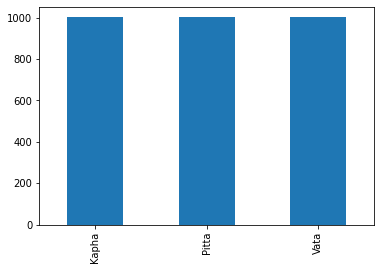

In [16]:
dataset['Prakruti'].value_counts().sort_index().plot.bar()

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)

(2402, 51057)
(601, 51057)


# Creating a multinomial naive Bayes classifier 

In [19]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [20]:
y_pred = classifier.predict(X_test)

## Checking Accuracy of Modal using some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score.

In [21]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay , RocCurveDisplay 
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
def get_metrics(y_test,y_predicted):
    accuracy = accuracy_score(y_test,y_predicted)
    precision = precision_score(y_test,y_predicted,average="weighted")
    recall = recall_score(y_test,y_predicted,average="weighted")
    f1 = f1_score(y_test,y_predicted,average="weighted")
    return accuracy , precision,recall,f1
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          153   29   13
1            2  169   31
2            4   24  176
accuracy = 0.829 
precision =0.840 
recall =0.829 
f1 =0.830


### Plotting Confusion Matrix of multinomial naive bayes classifier

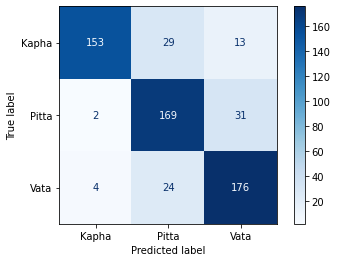

In [22]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of multinomial naive bayes classifier

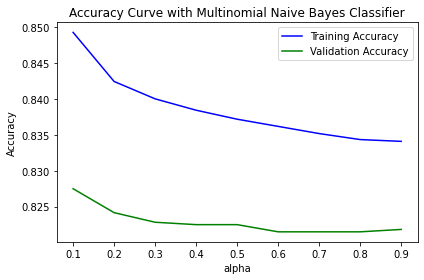

In [23]:
from sklearn.model_selection import validation_curve

parameter_range = np.arange(0.1, 1, 0.1)

train_score, test_score = validation_curve(MultinomialNB(), X, y,
                                       param_name = "alpha",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with Multinomial Naive Bayes Classifier")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

# Creating a k_nearest_neighbors classifier

In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [153]:
y_pred = classifier.predict(X_test)

In [154]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          188    6    4
1            8  189    2
2           11    5  188
accuracy = 0.940 
precision =0.941 
recall =0.940 
f1 =0.940


### Plotting Confusion Matrix of k_nearest_neighbors classifier

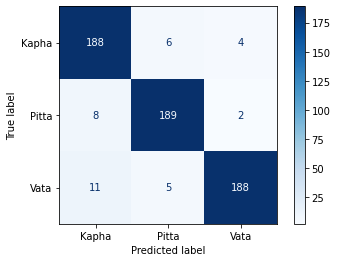

In [155]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of k_nearest_neighbors classifier

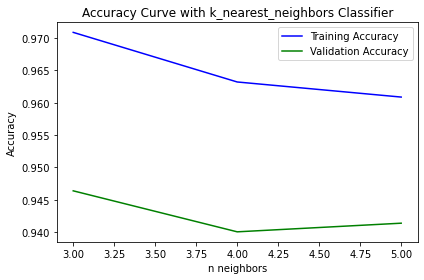

In [157]:
parameter_range = np.arange(3, 6, 1)

train_score, test_score = validation_curve(KNeighborsClassifier(metric = 'minkowski',p = 2), X, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with k_nearest_neighbors Classifier")
plt.xlabel("n neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

###  Creating a support_vector_machine classifier

In [72]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0,probability=True)
classifier.fit(X_train,y_train)

SVC(probability=True, random_state=0)

In [69]:
y_pred = classifier.predict(X_test)

In [27]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          199   10    3
1            4  180    3
2           10    9  183
accuracy = 0.935 
precision =0.936 
recall =0.935 
f1 =0.935


### Plotting Confusion Matrix of support_vector_machine classifier 

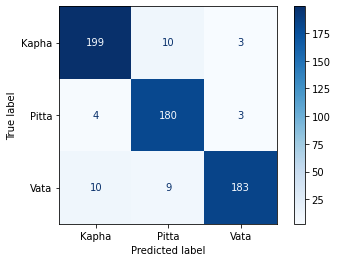

In [28]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of support_vector_machine classifier 

In [ ]:
parameter_range = ["linear", "poly", "rbf"]

train_score, test_score = validation_curve(SVC(random_state=0), X, y,
                                       param_name = "kernel",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with support_vector_machine classifier")
plt.xlabel("kernel")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

### Creating a decision_tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          200    3    9
1            7  175    5
2           12   10  180
accuracy = 0.923 
precision =0.924 
recall =0.923 
f1 =0.923


### Plotting Confusion Matrix of decision_tree classifier

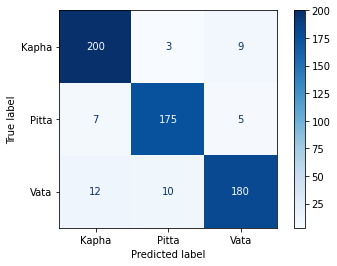

In [32]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of decision_tree classifier

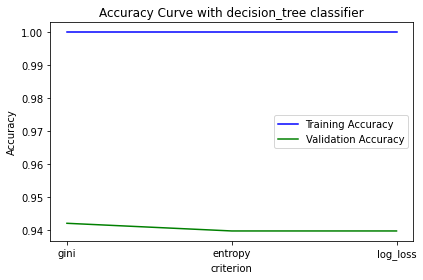

In [33]:
parameter_range = ["gini", "entropy", "log_loss"]

train_score, test_score = validation_curve(DecisionTreeClassifier(random_state=0), X, y,
                                       param_name = "criterion",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with decision_tree classifier")
plt.xlabel("criterion")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

### Creating a random_forest classifier 

In [98]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [99]:
y_pred = classifier.predict(X_test)

In [100]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          184    5    6
1            3  196    3
2            6    6  192
accuracy = 0.952 
precision =0.952 
recall =0.952 
f1 =0.952


### Plotting Confusion Matrix of random_forest classifier

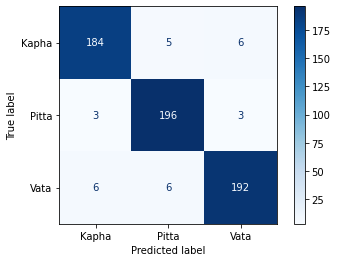

In [101]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of random_forest classifier

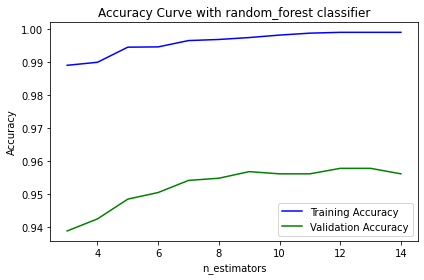

In [102]:
parameter_range = np.arange(3, 15, 1)

train_score, test_score = validation_curve(RandomForestClassifier(criterion = 'entropy',random_state = 0), X, y,
                                       param_name = "n_estimators",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with random_forest classifier")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

# Adding UI Component (Public Interface) 

In [103]:
import gradio as gr

In [104]:
labels = ['Kapha' , 'Pitta','Vata']

def getPrakruti(Enter_Your_Sequence):
        kmer_data = getKmers(str(Enter_Your_Sequence))
        text_data = ''
        for item in kmer_data:
            text_data = text_data + ' ' + item   
        X = cv.transform([text_data])
        prakruti = classifier.predict_proba(X)
        return {labels[0]:prakruti[0][0] ,labels[1]:prakruti[0][1],labels[2]:prakruti[0][2] }
#         if prakruti == 0:
#             return 'Kapha'
#         elif prakruti == 1:
#             return 'Pitta'
#         elif prakruti == 2:
#             return 'Vata'
        


In [107]:
iface = gr.Interface(fn=getPrakruti,inputs = "text",outputs="label",title="Ayurvedic Prakruti Classification using DNA Sequence")
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7867/
Running on public URL: https://36526.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x1d8e5391130>,
 'http://127.0.0.1:7867/',
 'https://36526.gradio.app')